In [10]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# imports the data
df = pd.read_feather('../../data/h201.feather')
health_vars = pd.read_csv('../../data/Health Status Variables.csv')

In [12]:
def eda_clean_df(df):
    df = df[(df['AGELAST']>=5) & (df['AGELAST']<=17)]
    df = df[(df['UNHAP42']>=0) & (df['UNHAP42']<=4)]
    df['UNHAP42'] = df['UNHAP42'].map({0:0, 1:1, 2:1, 3:1, 4:1})
    df['RACEV2X'] = df['RACEV2X'].replace({5:4, 6:4, 10:4, 12:5})
    return df

In [13]:
child_df = eda_clean_df(df)
child_df.shape

(5920, 1564)

In [14]:
child_df['RACEV2X'].value_counts()

1.0    4033
2.0    1095
5.0     392
4.0     364
3.0      36
Name: RACEV2X, dtype: int64

In [18]:
# children with special health care needs screener variables
special_needs = list(health_vars['VARIABLE'][30:45])

# columbia impairment scale
impairment = list(health_vars['VARIABLE'][45:58])

# Consumer Assessment of Healthcare Providers and Systems (CAHPS)
cahps = list(health_vars['VARIABLE'][58:72])

# all children variables 
all_child = list(health_vars['VARIABLE'][30:97])

#####
# other physical variables 
other = ['ADHDADDX']

# other identifier/demographic variables 
demo = ['AGELAST', 'SEX', 'RACEV2X', 'FAMINC17']

#### Children with Special Health Care Needs Variables 

In [19]:
# Creates a list of features from the Children with special health care needs variables
features = special_needs + other + demo

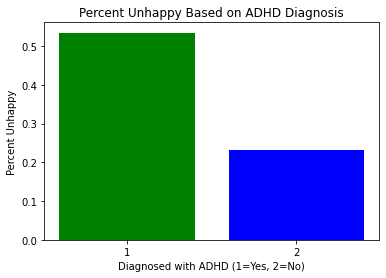

In [20]:
# Shows percent unhappy based on ADHD Diagnosis
add_df = child_df[child_df['ADHDADDX'] > 0]
plt.bar(add_df.groupby('ADHDADDX')['UNHAP42'].mean().index, 
        add_df.groupby('ADHDADDX')['UNHAP42'].mean(),
        color =['green','blue'])
plt.xticks(ticks=add_df.groupby('ADHDADDX')['UNHAP42'].mean().index)
plt.ylabel("Percent Unhappy")
plt.xlabel("Diagnosed with ADHD (1=Yes, 2=No)")
plt.title('Percent Unhappy Based on ADHD Diagnosis');

In [21]:
# Ask if teammates did any EDA on Children with Special Healthcare Needs Screener

In [23]:
plt.savefig('../../charts_graphs/adhd.png')

<Figure size 432x288 with 0 Axes>